In [1]:
# Please download the dataset and save it in the 'data' folder.
# The folder structure should be as follows:
# ./data/
# ├── train/
# │   ├── images/  # Training images
# │   │   └── example_image.jpg  # Example training image
# │   └── labels/  # Training labels
# │       └── example_label.txt  # Example training label -> 0 0.6572081965784873 0.7418986824402122 0.1641185514388546 0.06947686474396152
# └── val/
#     ├── images/  # Validation images
#     │   └── example_image.jpg  # Example validation image
#     └── labels/  # Validation labels
#         └── example_label.txt  # Example validation label -> 0 0.6572081965784873 0.7418986824402122 0.1641185514388546 0.06947686474396152

print('TRaiFIC : ANNPR')


TRaiFIC : ANNPR


In [2]:
# Install necessary libraries
# !pip install ultralytics 
print('installed ultraalytics')
# !pip install split-folders # This library is used to split the dataset into train and validation set if your dataset is not already split.
print('installed split-folders')


installed ultraalytics
installed split-folders


In [11]:
# Import necessary libraries
import os
print('os')
import splitfolders
print('splitfolders')
import yaml
print('yaml')
from ultralytics import YOLO
print('ultralytics')


os
splitfolders
yaml
ultralytics


In [4]:
# Check if the path exists and print the data
data_path = os.path.abspath('./data')

if os.path.exists(data_path):
    print("Path exists.")
    print("Contents of data folder:", os.listdir(data_path))
    
    # Check for 'train' and 'val' directories
    train_path = os.path.join(data_path, 'train')
    val_path = os.path.join(data_path, 'val')
    
    if os.path.exists(train_path) and os.listdir(train_path):
        print("'train' directory exists and contains files.")
    else:
        print("'train' directory does not exist or is empty.")
    
    if os.path.exists(val_path) and os.listdir(val_path):
        print("'val' directory exists and contains files.")
    else:
        print("'val' directory does not exist or is empty.")
        
    print("Data path check completed.")
    print("You can now proceed with the data processing.")
else:
    print("Path does not exist.")


Path exists.
Contents of data folder: ['train', 'val']
'train' directory exists and contains files.
'val' directory exists and contains files.
Data path check completed.
You can now proceed with the data processing.


In [5]:
# import splitfolders

# downloaded_path = os.path.abspath(r'C:/Users/ACER/.cache/datasets/vehicle_number_plate_detection') # Change this to your source directory
# working_dir = os.path.abspath('data/')

# print("Source directory:", downloaded_path)
# print("Destination directory:", working_dir)

# if not os.path.exists(downloaded_path):
#     print("Source directory does not exist. Please check the path.")
# else:
#     # splitfolders.ratio(downloaded_path, working_dir, seed=42, ratio=(0.8, 0.2))
#     print("Dataset split completed")

## yaml file
names: [number_plate]
nc: 1
train: F:\development\python\Number-Plate-Detection\platedetection\data\train\images
val: F:\development\python\Number-Plate-Detection\platedetection\data\val\images

In [13]:

# Step 2: Update the YAML file with the new paths
yaml_file_path = os.path.abspath('number_plate.yaml')  # Dynamic path resolution

# Ensure directory exists
os.makedirs(os.path.dirname(yaml_file_path), exist_ok=True)

# Create/update YAML content with proper structure
data = {
    'train': os.path.join(data_path, 'train3', 'images'),
    'val': os.path.join(data_path, 'val', 'images'),
    'nc': 1,  
    'names': ['number_plate']
}

# Write the updated YAML file
with open(yaml_file_path, 'w') as f:
    yaml.safe_dump(data, f, default_flow_style=None)

print(f"YAML file updated: {yaml_file_path}")
print("YAML content:")
print(yaml.dump(data, default_flow_style=None))

YAML file updated: F:\development\python\ANPR\models\pd-traific\number_plate.yaml
YAML content:
names: [number_plate]
nc: 1
train: F:\development\python\ANPR\models\pd-traific\data\train3\images
val: F:\development\python\ANPR\models\pd-traific\data\val\images



In [14]:
 
# Get the absolute path of the YAML file
yaml_path = os.path.abspath('number_plate.yaml')
print(yaml_path)  # Print the path to verify its location

# Open and read the YAML file to verify its content
print("\nVerify YAML content:\n")
with open(yaml_path, 'r') as f:
    print(f.read())  # Print the content of the YAML file

F:\development\python\ANPR\models\pd-traific\number_plate.yaml

Verify YAML content:

names: [number_plate]
nc: 1
train: F:\development\python\ANPR\models\pd-traific\data\train3\images
val: F:\development\python\ANPR\models\pd-traific\data\val\images




## Preparing for Training

### Steps to Prepare for Training:

1. **Check GPU Availability**:
    - Ensure that your system has a GPU available for faster training.
    - Use `device='0'` in the training script if a GPU is available.
    - If no GPU is available, remove the `device` parameter or set it to `None` to use the CPU.

2. **Train the Model**:
    - Use the `YOLO` model to start training.
    - Ensure that the YAML file is correctly configured with the paths to the training and validation datasets.
    - Adjust the training parameters such as `imgsz`, `epochs`, and `batch` size as needed.

3. **Command to Train**:
    ```python
    results = model.train(
         model=None,
         pretrained=False,
         data=yaml_path,
         imgsz=640,
         epochs=1,
         device='0',  # Use GPU if available, otherwise remove this line
         batch=4,
         project=os.path.abspath('training_results'),
         name='traific_pd_v1',
         cache=True
    )
    ```

4. **Verify Training**:
    - After training, check the `training_results` directory for the trained model and logs.
    - Ensure the best-trained model is saved in the `weights` folder.

### Notes:
- If CUDA is not available, you may need to upgrade PyTorch to a CUDA-enabled version.
- For systems without a GPU, training may take significantly longer.


 
## Check for GPU Availability

Before proceeding with training, it is essential to verify if a GPU is available on your system. A GPU significantly accelerates the training process. Use the following code to check for GPU availability and its details:

```python
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU name: {torch.cuda.get_device_name(0)}" if torch.cuda.is_available() else "No GPU detected")
```

### Notes:
- If `CUDA available` is `False`, you may need to upgrade PyTorch to a CUDA-enabled version.
- For systems without a GPU, training will default to the CPU, which may take significantly longer.
 

In [15]:
# check for gpu avaiable if CUDA avaiable : false then may need to upgrade the pytorch
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU name: {torch.cuda.get_device_name(0)}" if torch.cuda.is_available() else "No GPU detected")

PyTorch version: 2.7.0+cu118
CUDA available: True
GPU name: GeForce GTX 1650


In [9]:
# #  If any error Uninstall existing PyTorch
# pip uninstall torch torchvision torchaudio

# # Install CUDA-enabled PyTorch (adjust for your CUDA version)
# # For CUDA 11.8 (recommended for GTX 1650):
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# for uv 
 # uv pip install torch==2.6.0+cu118 torchvision==0.21.0+cu118 torchaudio==2.6.0+cu118 --index-url https://download.pytorch.org/whl/cu118

In [10]:
## Training the Model

# - Load the Model
# - Train The Model

In [ ]:
# from ultralytics import YOLO

model = YOLO()

results = model.train(
    model=None, # Use the default YOLOv8n model
    data=yaml_path,
    imgsz=640,
    epochs=30,
    batch=4,
    device='0', # for device with gpu avaiable otherwise remove this
    pretrained=False,
    project=os.path.abspath('training_results_mix'),
    name='traific_pd_mix_v1',
    cache=True
)
metrics = model.val()
print(metrics)

New https://pypi.org/project/ultralytics/8.3.117 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.116  Python-3.10.17 torch-2.7.0+cu118 CUDA:0 (GeForce GTX 1650, 4096MiB)
engine\trainer: task=detect, mode=train, model=None, data=F:\development\python\ANPR\models\pd-traific\number_plate.yaml, epochs=30, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=8, project=F:\development\python\ANPR\models\pd-traific\training_results_mix, name=traific_pd_mix_v1, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agn

train: Scanning F:\development\python\ANPR\models\pd-traific\data\train3\labels


train: New cache created: F:\development\python\ANPR\models\pd-traific\data\train3\labels.cache
WARNING Box and segment counts should be equal, but got len(segments) = 346, len(boxes) = 7321. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
WARNING train: 8.6GB RAM required to cache images with 50% safety margin but only 2.5/7.8GB available, not caching images
val: Fast image access  (ping: 1.91.1 ms, read: 30.410.5 MB/s, size: 78.4 KB)


val: Scanning F:\development\python\ANPR\models\pd-traific\data\val\labels.cach


WARNING val: 2.0GB RAM required to cache images with 50% safety margin but only 0.5/7.8GB available, not caching images
Plotting labels to F:\development\python\ANPR\models\pd-traific\training_results_mix\traific_pd_mix_v1\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to F:\development\python\ANPR\models\pd-traific\training_results_mix\traific_pd_mix_v1
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.14G     0.9267      1.442     0.9865          3        640: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       1616       1745       0.91      0.909      0.953      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       1.7G     0.9088     0.8011     0.9942          2        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.913      0.889       0.95      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.71G     0.8606     0.7329     0.9823          2        640: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       1616       1745      0.928      0.906      0.959      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.72G     0.8498     0.6914     0.9764          2        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.921       0.91      0.959      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.72G      0.791     0.6321     0.9519          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       1616       1745      0.946      0.919      0.973      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.72G     0.7681       0.59     0.9439          2        640: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       1616       1745       0.95       0.93      0.975      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.72G     0.7311     0.5627     0.9315          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       1616       1745      0.944      0.933      0.974      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.72G      0.714     0.5513     0.9267          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.944       0.95      0.981      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.72G     0.7083     0.5242     0.9291          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       1616       1745      0.963      0.942      0.984       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.72G     0.6825     0.5122     0.9097          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.952      0.939      0.981      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.72G     0.6719     0.4938     0.9114          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       1616       1745      0.951      0.947      0.981       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.72G     0.6534     0.4733     0.9023          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.971      0.934      0.985      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.72G     0.6503     0.4723     0.9018          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.942      0.955      0.986      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.72G     0.6389     0.4587     0.9022          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.966      0.939      0.986      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.72G     0.6264     0.4561     0.8976          3        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.952       0.95      0.985       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.72G     0.6213     0.4407     0.8951          2        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.959      0.949      0.986      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.72G     0.6144     0.4347     0.8898          0        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.967      0.956      0.986      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.72G     0.6114     0.4305      0.892          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       1616       1745      0.962      0.951      0.987      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.72G     0.5922     0.4131     0.8896          4        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.973      0.945      0.987      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.72G     0.5774     0.4044     0.8847          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.956      0.964      0.987      0.902


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.72G       0.54     0.3556     0.8583          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.962      0.959      0.988      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.72G     0.5201     0.3423     0.8548          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.968      0.954      0.989      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.72G     0.5091     0.3367     0.8507          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.962      0.961      0.989       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.72G     0.4987     0.3258     0.8448          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       1616       1745      0.965       0.96      0.989      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.72G      0.492     0.3191     0.8434          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.973      0.958       0.99      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.72G     0.4792      0.304     0.8416          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.965      0.963      0.991      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.72G     0.4711     0.3037     0.8407          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       1616       1745      0.966      0.964      0.991      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.72G     0.4592     0.2885     0.8361          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.973      0.956      0.991      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.72G     0.4528     0.2836     0.8334          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.971      0.964      0.992      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.72G     0.4411     0.2777     0.8287          1        640: 
                 Class     Images  Instances      Box(P          R      mAP50  

                   all       1616       1745      0.978      0.958      0.992      0.928



30 epochs completed in 2.589 hours.
Optimizer stripped from F:\development\python\ANPR\models\pd-traific\training_results_mix\traific_pd_mix_v1\weights\last.pt, 5.4MB
Optimizer stripped from F:\development\python\ANPR\models\pd-traific\training_results_mix\traific_pd_mix_v1\weights\best.pt, 5.4MB

Validating F:\development\python\ANPR\models\pd-traific\training_results_mix\traific_pd_mix_v1\weights\best.pt...
Ultralytics 8.3.116  Python-3.10.17 torch-2.7.0+cu118 CUDA:0 (GeForce GTX 1650, 4096MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  


                   all       1616       1745      0.978      0.958      0.992      0.928
Speed: 0.3ms preprocess, 5.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to F:\development\python\ANPR\models\pd-traific\training_results_mix\traific_pd_mix_v1


In [13]:
# Define the model path for the best-trained model
model_path = os.path.abspath('training_results/traific_pd_v1/weights/best.pt')

# Check if the model path exists
if os.path.exists(model_path):
    print(f"Model path exists: {model_path}")
else:
    print(f"Model path does not exist: {model_path}")

Model path exists: F:\development\python\ANPR\models\pd-traific\training_results\traific_pd_v1\weights\best.pt


In [17]:
import os

# Set the locale environment variables
os.environ['LANG'] = 'C.UTF-8'
os.environ['LC_ALL'] = 'C.UTF-8'


In [1]:
def plot_training_results(training_results_path):
    """
    Function to plot training loss and validation metrics from the results.csv file.

    Args:
        training_results_path (str): Path to the directory containing the results.csv file.
    """
    # Ensure plots show in the notebook
    %matplotlib inline

    import os
    import pandas as pd
    import matplotlib.pyplot as plt

    # Define path to results.csv
    results_csv_path = os.path.join(training_results_path, 'results.csv')

    # Check and load the CSV file
    if os.path.exists(results_csv_path):
        results_df = pd.read_csv(results_csv_path)
        print("Columns in results.csv:", results_df.columns)

        # Plot Training Loss
        plt.figure(figsize=(10, 6))
        plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Box Loss')
        plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Class Loss')
        plt.plot(results_df['epoch'], results_df['train/dfl_loss'], label='DFL Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Epochs')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plot Validation Metrics
        plt.figure(figsize=(10, 6))
        plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision')
        plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall')
        plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP@0.5')
        plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
        plt.xlabel('Epoch')
        plt.ylabel('Metric Value')
        plt.title('Validation Metrics Over Epochs')
        plt.legend()
        plt.grid(True)
        plt.show()

    else:
        print(f"Results file not found at {results_csv_path}")


       

Columns in results.csv: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


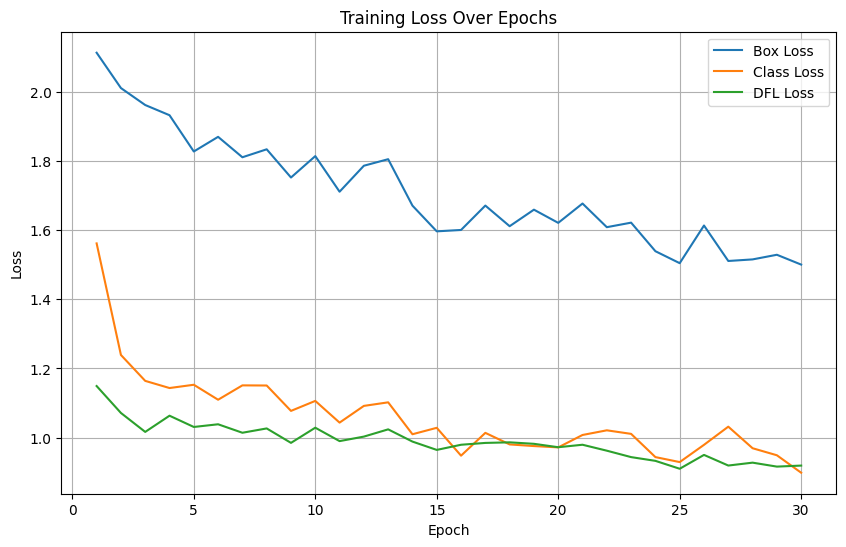

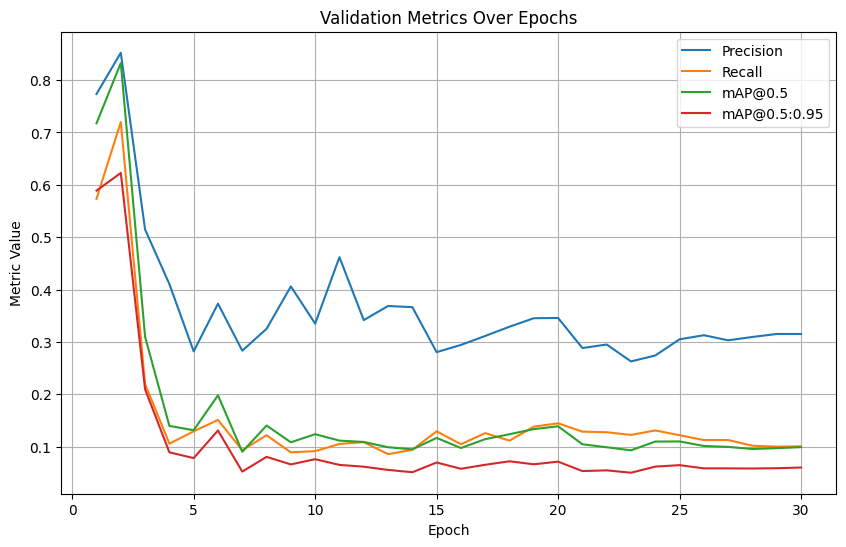

In [ ]:
# plot function
import os
training_results_path = os.path.abspath('training_results/traific_pd_v13')
plot_training_results(training_results_path)

In [30]:
training_results_path = os.path.abspath('training_results/traific_pd_v1')
os.listdir(training_results_path)

['args.yaml',
 'confusion_matrix.png',
 'confusion_matrix_normalized.png',
 'F1_curve.png',
 'labels.jpg',
 'labels_correlogram.jpg',
 'PR_curve.png',
 'P_curve.png',
 'results.csv',
 'results.png',
 'R_curve.png',
 'train_batch0.jpg',
 'train_batch1.jpg',
 'train_batch2.jpg',
 'val_batch0_labels.jpg',
 'val_batch0_pred.jpg',
 'val_batch1_labels.jpg',
 'val_batch1_pred.jpg',
 'val_batch2_labels.jpg',
 'val_batch2_pred.jpg',
 'weights']

Checking for the model on real data images or videos


In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


2.7.0+cu118
True
GeForce GTX 1650


In [4]:
from ultralytics import YOLO
import cv2
import numpy as np
import os
print('load models')

# model_path = os.path.abspath('training_results/traific_pd_v1/weights/best.pt')
model_path = 'F:/development/python/Number-Plate-Detection/platedetection/training_results/license_plate_detection_yolov8_4_14_25_4_493/weights/best.pt'

model = YOLO(model_path)
print('load video')

# Load video
video_path = os.path.abspath('input_files/highway_orginal_trim.mp4')
cap = cv2.VideoCapture(video_path)
print('load Output')

# Output folder
output_dir = "output_files"
os.makedirs(output_dir, exist_ok=True)

# Store best plate crops per ID
tracked_plates = {}

# Define font for display
font = cv2.FONT_HERSHEY_SIMPLEX

# Tracking on each frame
for result in model.track(source=video_path, stream=True, conf=0.4, iou=0.5, persist=True):
    frame = result.orig_img
    boxes = result.boxes

    if boxes is None or boxes.id is None:
        continue

    ids = boxes.id.cpu().numpy()
    confs = boxes.conf.cpu().numpy()
    coords = boxes.xyxy.cpu().numpy()

    for id_, conf, box in zip(ids, confs, coords):
        x1, y1, x2, y2 = map(int, box)
        crop = frame[y1:y2, x1:x2]

        # Update best plate if new or higher confidence
        if id_ not in tracked_plates or conf > tracked_plates[id_]["conf"]:
            tracked_plates[id_] = {"conf": conf, "plate": crop}

        # Draw bounding box and ID
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f'ID: {int(id_)} Conf: {conf:.2f}', (x1, y1 - 10), font, 0.6, (0, 255, 255), 2)

    # Show the frame with annotations
    cv2.imshow("Tracking", frame)

    # Press 'q' to quit early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

# Save the best plate crops after processing
for id_, data in tracked_plates.items():
    filename = os.path.join(output_dir, f"vehicle_{int(id_)}_plate.jpg")
    cv2.imwrite(filename, data["plate"])
    print(f"Saved: {filename}")


load models
load video
load Output

video 1/1 (frame 1/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 (no detections), 47.7ms
video 1/1 (frame 2/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 (no detections), 15.2ms
video 1/1 (frame 3/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 (no detections), 19.7ms
video 1/1 (frame 4/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 1 number_plate, 23.4ms
video 1/1 (frame 5/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 1 number_plate, 18.1ms
video 1/1 (frame 6/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 (no detections), 20.5ms
video 1/1 (frame 7/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 1 n

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import os


# Load YOLO model
model_path = os.path.abspath('training_results_mix/traific_pd_mix_v1/weights/best.pt')
print('load models')
# model_path = 'F:/development/python/Number-Plate-Detection/platedetection/training_results/license_plate_detection_yolov8_4_14_25_4_493/weights/best.pt'

model = YOLO(model_path)

print('load video')
# Load video
video_path = os.path.abspath('input_files/highway_orginal_trim.mp4')
cap = cv2.VideoCapture(video_path)

# Output folder
output_dir = "output_files"
os.makedirs(output_dir, exist_ok=True)

# Store best plate crops per ID
tracked_plates = {}

# Define font for display
font = cv2.FONT_HERSHEY_SIMPLEX

# Define desired fixed height for preview window
fixed_height = 600  # in pixels

# Tracking on each frame
for result in model.track(source=video_path, stream=True, conf=0.4, iou=0.5, persist=True):
    frame = result.orig_img
    boxes = result.boxes

    if boxes is None or boxes.id is None:
        continue

    ids = boxes.id.cpu().numpy()
    confs = boxes.conf.cpu().numpy()
    coords = boxes.xyxy.cpu().numpy()

    for id_, conf, box in zip(ids, confs, coords):
        x1, y1, x2, y2 = map(int, box)
        crop = frame[y1:y2, x1:x2]

        # Update best plate if new or higher confidence
        if id_ not in tracked_plates or conf > tracked_plates[id_]["conf"]:
            tracked_plates[id_] = {"conf": conf, "plate": crop}

        # Draw bounding box and ID
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f'ID: {int(id_)} Conf: {conf:.2f}', (x1, y1 - 10), font, 0.6, (0, 255, 255), 2)

    # Resize frame to fixed height while maintaining aspect ratio
  # Resize frame to fit within max height and width while preserving aspect ratio
    # Resize frame to fit within max height and width while preserving aspect ratio
    max_height = 600  # Maximum height for preview
    max_width = 800   # Maximum width for preview
    
    height, width = frame.shape[:2]
    scale_ratio = min(max_width / width, max_height / height)
    new_width = int(width * scale_ratio)
    new_height = int(height * scale_ratio)
    resized_frame = cv2.resize(frame, (new_width, new_height))



    # Show the resized frame with annotations
    cv2.imshow("Tracking", resized_frame)

    # Press 'q' to quit early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

# Save the best plate crops after processing
for id_, data in tracked_plates.items():
    filename = os.path.join(output_dir, f"vehicle_{int(id_)}_plate.jpg")
    cv2.imwrite(filename, data["plate"])
    print(f"Saved: {filename}")


load models
load video

video 1/1 (frame 1/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 (no detections), 14.9ms
video 1/1 (frame 2/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 (no detections), 22.4ms
video 1/1 (frame 3/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 (no detections), 14.6ms
video 1/1 (frame 4/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 (no detections), 11.5ms
video 1/1 (frame 5/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 (no detections), 15.3ms
video 1/1 (frame 6/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 (no detections), 14.7ms
video 1/1 (frame 7/12480) F:\development\python\ANPR\models\pd-traific\input_files\highway_orginal_trim.mp4: 256x640 (no detection